In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.ndimage.filters import gaussian_filter
from pylab import rcParams
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy import units as u

In [3]:
filename = get_pkg_data_filename('/Users/orion/phd_research/hst/cropped_drc/1025+390_f336w_new.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

filename2 = get_pkg_data_filename('/Users/orion/phd_research/hst/cropped_drc/1025+390_f763m_new.fits')
wcs2 = WCS(hdu2.header)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 157.1988822958352  38.76579334032697  
CRPIX : 1832.41104479879  1871.67129763402  
CD1_1 CD1_2  : -3.8412689228348e-06  1.0425998426334e-05  
CD2_1 CD2_2  : 1.0425998426334e-05  3.84126892283488e-06  
NAXIS : 563  459 (459, 563)


In [ ]:
# original image- shows titled ticks/grid

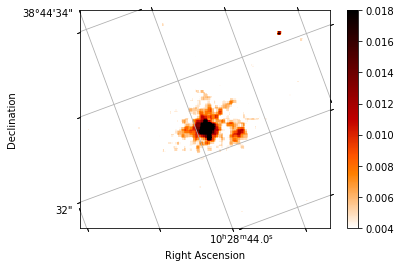

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs)


hdu.data = gaussian_filter(hdu.data, 1.0)
im = ax.imshow(hdu.data, vmin=0.004, vmax=0.018, origin='lower', cmap= 'gist_heat_r', interpolation='none') 
                                                                #interpolation='gaussian', cmap='binary,magma'

lon = ax.coords[0]
lat = ax.coords[1]
#plt.style.use('classic')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_xlim(200, hdu.data.shape[1] - 180)
ax.set_ylim(150, hdu.data.shape[0] - 150)
ax.grid(True)

fig.colorbar(im, ax=ax)


In [4]:
wcs.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      1832.4110447988 / Pixel coordinate of reference point            
CRPIX2  =       1871.671297634 / Pixel coordinate of reference point            
PC1_1   = -3.8412689228348E-06 / Coordinate transformation matrix element       
PC1_2   =  1.0425998426334E-05 / Coordinate transformation matrix element       
PC2_1   =  1.0425998426334E-05 / Coordinate transformation matrix element       
PC2_2   =  3.8412689228349E-06 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'        

In [6]:
wcs2.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      1737.9157947879 / Pixel coordinate of reference point            
CRPIX2  =       1826.671297634 / Pixel coordinate of reference point            
PC1_1   = -3.8412689228363E-06 / Coordinate transformation matrix element       
PC1_2   =  1.0425998426333E-05 / Coordinate transformation matrix element       
PC2_1   =  1.0425998426333E-05 / Coordinate transformation matrix element       
PC2_2   =  3.8412689228363E-06 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'        

In [ ]:
# reprojecting image onto a new "straightened" WCS grid 

In [12]:
from reproject.mosaicking import find_optimal_celestial_wcs

hdu_temp = fits.open(filename)
wcs_out, shape_out = find_optimal_celestial_wcs(hdu_temp)

In [13]:
wcs_out.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =     -691.27894849475 / Pixel coordinate of reference point            
CRPIX2  =      2366.3456442632 / Pixel coordinate of reference point            
CDELT1  = -1.1111111111111E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  1.1111111111111E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'           / Declination, gnomonic projection               
CRVAL1  =      157.19888229584 / [deg] Coordinate value at reference point      
CRVAL2  =      38.765793340327 / [deg] Coordinate value at reference point      
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =      38.7657933403

In [14]:
shape_out

(687, 625)

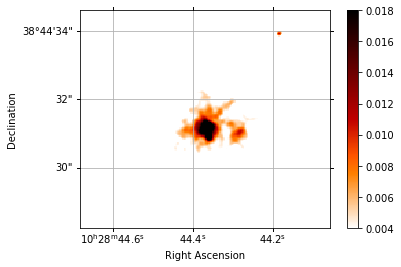

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs_out)

hdu_temp[0].data = gaussian_filter(hdu_temp[0].data, 1.0)
im_new = ax.imshow(hdu_temp[0].data, vmin=0.004, vmax=0.018, origin='lower', cmap= 'gist_heat_r', interpolation='none') 
                                                               
lon = ax.coords[0]
lat = ax.coords[1]
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_xlim(200, hdu_temp[0].data.shape[1] - 180)
ax.set_ylim(150, hdu_temp[0].data.shape[0] - 150)
ax.grid()
fig.colorbar(im_new, ax=ax)


In [ ]:
#      ************************     North-up alignment     ************************

In [64]:
import montage_wrapper as montage

# no use without reproject's WCS manipulation - ends up simply rotating image with old grid

INFO: Deleting work directory /var/folders/nd/5w_l4vtx1c1g08hm82zlp6p40000gn/T/tmprsnehnqe [montage_wrapper.wrappers]


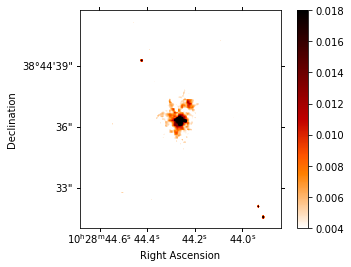

In [65]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection=wcs)
ax = fig.add_subplot(111, projection=wcs_out)

hdu = montage.reproject_hdu(hdu, north_aligned=True) 
hdu.data = gaussian_filter(hdu.data, 1.0)
im_new2 = ax.imshow(hdu.data, vmin=0.004, vmax=0.018, origin='lower', cmap= 'gist_heat_r', interpolation='none') 
                                                                #interpolation='gaussian', cmap='binary,magma'

lon = ax.coords[0]
lat = ax.coords[1]
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_xlim(200, hdu.data.shape[1] - 180)
ax.set_ylim(220, hdu.data.shape[0] - 200)

fig.colorbar(im_new2, ax=ax)


In [ ]:
#  plotting HST image with radio contours 

In [7]:
from reproject.mosaicking import find_optimal_celestial_wcs
import glob 
import os

dirname = '/Users/orion/phd_research/hst/cropped_drc/'
list_hdus =  [fits.open(filenames)[0] for filenames in glob.glob(os.path.join(dirname, '1025+390_*_new.fits'))]
print (list_hdus)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fb29ca77e90>, <astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fb29caca990>]


In [8]:
wcs_out0, shape_out2 = find_optimal_celestial_wcs(list_hdus)
wcs_out0.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =     -691.39430257878 / Pixel coordinate of reference point            
CRPIX2  =      2366.0398766486 / Pixel coordinate of reference point            
CDELT1  = -1.1111111111111E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  1.1111111111111E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'           / Declination, gnomonic projection               
CRVAL1  =       157.1988839391 / [deg] Coordinate value at reference point      
CRVAL2  =      38.765789943134 / [deg] Coordinate value at reference point      
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =      38.7657899431

In [9]:
hdu_temp3 = fits.open(filename)
hdu_temp4 = fits.open(filename2)

wcs_out3, shape_out3 = find_optimal_celestial_wcs([hdu_temp4,hdu_temp3])  #passing each file manually
wcs_out3.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =     -691.39430257878 / Pixel coordinate of reference point            
CRPIX2  =      2366.0398766486 / Pixel coordinate of reference point            
CDELT1  = -1.1111111111111E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  1.1111111111111E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'           / Declination, gnomonic projection               
CRVAL1  =       157.1988839391 / [deg] Coordinate value at reference point      
CRVAL2  =      38.765789943134 / [deg] Coordinate value at reference point      
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =      38.7657899431

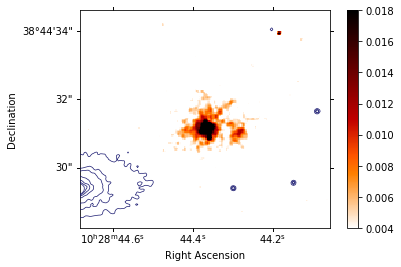

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs_out3)

hdu_temp3[0].data = gaussian_filter(hdu_temp3[0].data, 1.0)
im_new = ax.imshow(hdu_temp3[0].data, vmin=0.004, vmax=0.018, origin='lower', cmap= 'gist_heat_r', interpolation='none') 


hdu_temp4[0].data = gaussian_filter(hdu_temp4[0].data, 1.0)
ax.contour(hdu_temp4[0].data, transform=ax.get_transform(wcs_out3),levels=[0.02,0.045,0.06,0.11,0.14,0.17,0.2],
                                                        colors='midnightblue', alpha=1.0, linewidths=0.7)

lon = ax.coords[0]
lat = ax.coords[1]
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_xlim(200, hdu_temp3[0].data.shape[1] - 180)
ax.set_ylim(150, hdu_temp3[0].data.shape[0] - 150)

fig.colorbar(im_new, ax=ax)

In [22]:
filename = get_pkg_data_filename('/Users/orion/phd_research/hst/cropped_drc/1025+390_f336w_new.fits')
filename2 = get_pkg_data_filename('/Users/orion/phd_research/hst/cropped_drc/1025+390_f763m_new.fits')


hdu_336 = fits.open(filename)
hdu_763 = fits.open(filename2)

In [61]:
wcs_out336, shape_out336 = find_optimal_celestial_wcs(hdu_336)

wcs_out336.to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =     -691.27894849475 / Pixel coordinate of reference point            
CRPIX2  =      2366.3456442632 / Pixel coordinate of reference point            
CDELT1  = -1.1111111111111E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  1.1111111111111E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'           / Declination, gnomonic projection               
CRVAL1  =      157.19888229584 / [deg] Coordinate value at reference point      
CRVAL2  =      38.765793340327 / [deg] Coordinate value at reference point      
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =      38.7657933403

In [51]:
shape_out336

(687, 625)

In [ ]:
new_header336 = wcs_out336.to_header()

# write a new HDU file with hdu_336[0].data and "new_header336" as header => new_header_hdu336

In [82]:
hdu_336_temp = fits.open(filename)[0]
hdu_763_temp = fits.open(filename2)[0]

#hdu_763_temp.header

In [80]:
from reproject import reproject_interp

#registered_763_data, registered_763_footprint = reproject_interp(hdu_763_temp, new_header336_hdu[0].header)
registered_763_data, registered_763_footprint = reproject_interp(hdu_763_temp, wcs_out336,(687, 625))

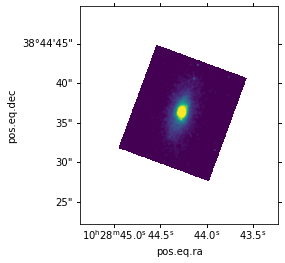

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs_out336)

ax.imshow(registered_763_data, origin='lower', vmin=0.003, vmax=0.06)

In [84]:
registered_336_data, registered_336_footprint = reproject_interp(hdu_336_temp, wcs_out336,(687, 625))

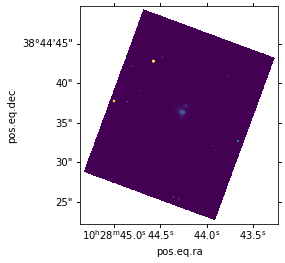

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs_out336)

ax.imshow(registered_336_data, origin='lower', vmin=0.003, vmax=0.06)

In [ ]:
#     ************    Automatic North-up alignment with reproject (no need for montage)   ***********

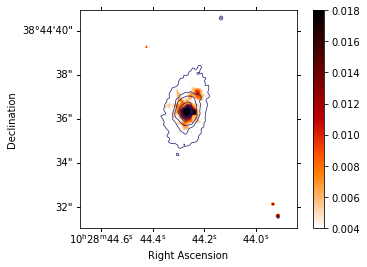

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs_out336)

registered_336_data = gaussian_filter(registered_336_data, 1.0)
im_new = ax.imshow(registered_336_data, vmin=0.004, vmax=0.018, origin='lower', cmap= 'gist_heat_r', interpolation='none') 

registered_763_data = gaussian_filter(registered_763_data, 1.0)
ax.contour(registered_763_data, transform=ax.get_transform(wcs_out336),levels=[0.02,0.045,0.06,0.11,0.14,0.17,0.2],
                                                        colors='midnightblue', alpha=1.0, linewidths=0.7)

lon = ax.coords[0]
lat = ax.coords[1]
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_xlim(200, hdu_336_temp.data.shape[1] - 180)
ax.set_ylim(220, hdu_336_temp.data.shape[0] - 220)

fig.colorbar(im_new, ax=ax)